In [19]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from env1.Pendulum import Pendulum
from Pods2 import train
from IPython.display import clear_output
from functools import partial

trajectory_length = 1000
num_samples = 1800

Pendulum = Pendulum()

11


big epoch: 29 small epoch: 0 Loss 7.5788215e-05
big epoch: 29 small epoch: 1 Loss 6.961184e-05
big epoch: 29 small epoch: 2 Loss 8.171176e-05
big epoch: 29 small epoch: 3 Loss 8.297717e-05
big epoch: 29 small epoch: 4 Loss 9.699478e-05
big epoch: 29 small epoch: 5 Loss 8.139417e-05
big epoch: 29 small epoch: 6 Loss 7.506262e-05
big epoch: 29 small epoch: 7 Loss 7.0944356e-05
big epoch: 29 small epoch: 8 Loss 7.149374e-05
big epoch: 29 small epoch: 9 Loss 7.0265625e-05
big epoch: 29 small epoch: 10 Loss 7.053487e-05
big epoch: 29 small epoch: 11 Loss 6.905662e-05
big epoch: 29 small epoch: 12 Loss 7.076204e-05
big epoch: 29 small epoch: 13 Loss 6.894558e-05
big epoch: 29 small epoch: 14 Loss 6.9219954e-05
big epoch: 29 small epoch: 15 Loss 6.9186426e-05
big epoch: 29 small epoch: 16 Loss 6.965554e-05
big epoch: 29 small epoch: 17 Loss 6.972284e-05
big epoch: 29 small epoch: 18 Loss 6.953641e-05
big epoch: 29 small epoch: 19 Loss 6.977866e-05


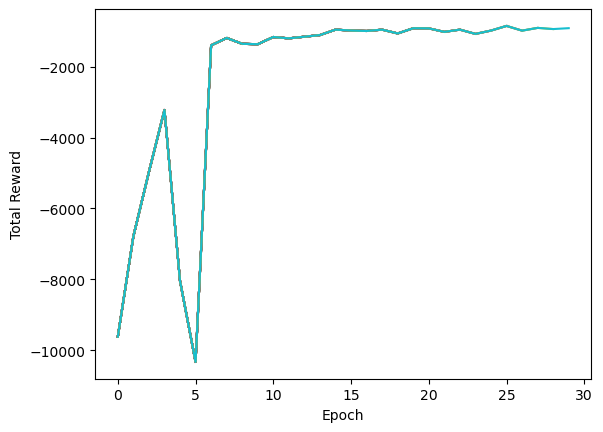

In [2]:
env = Pendulum()

def progress_f(x_data,y_data,epoch,reward):
    print(reward)
    x_data.append(epoch)
    y_data.append(reward)
    clear_output(wait=True)
    plt.xlabel('Epoch')
    plt.ylabel('Total Reward')
    plt.plot(x_data, y_data)
policy_pods = train(env,trajectory_length=100 ,num_samples=50,epochs=30, inner_epochs=20, alpha_a=2e-4, init_learning_rate=1e-3, progress_fn=progress_f)

In [20]:
inference_fn_pods = policy_pods()
def generate_input(state,rng):
    inference_fn_pods(state)+0.1*jax.random.normal(rng,shape=(1,1))

In [21]:

observation_t = None
observation_tp = None
action_t = None
@partial(jax.vmap,in_axes=(None,None,None,0))
def rollout_policy(
        env, inference_fn, trajectory_length: int, prng_keys
    ):

    def step_trajectory(state_carry, rng_key):
        action = inference_fn(state_carry.obs)
        next_state = env.step(state_carry, action)
        return next_state, (state_carry.obs, action, next_state.reward)

    state = env.reset(prng_keys)
    keys = jax.random.split(prng_keys, trajectory_length)
    _, (states, actions, rewards_future) = jax.lax.scan(
        step_trajectory, state, xs=keys
    )

    states = jax.numpy.reshape(
        states, (trajectory_length, env.observation_size)
    )
    actions = jax.numpy.reshape(
        actions, (trajectory_length, env.action_size)
    )

    return states, actions



In [28]:
states,actions = rollout_policy(Pendulum,inference_fn_pods,100,jax.random.split(jax.random.PRNGKey(0), num=18000))


In [42]:
@jax.vmap
def split_states_statestp(states):
    return states[:-1],states[1:]

observation_t,observation_tp = split_states_statestp(states)

def vstack(x,y):
    return jnp.vstack((x,y))

for i in range(len(states)):
    print(i)
    if i == 0:
        action_t = actions[i,:-1]
        states_t = observation_t[i]
        states_tp = observation_tp[i]
    else:
        action_t = jnp.vstack((action_t,actions[i,:-1]))
        states_t = jnp.vstack((states_t,observation_t[i]))
        states_tp = jnp.vstack((states_tp,observation_tp[i]))
    print(action_t.shape)


0
(99, 1)
1
(198, 1)
2
(297, 1)
3
(396, 1)
4
(495, 1)
5
(594, 1)
6
(693, 1)
7
(792, 1)
8
(891, 1)
9
(990, 1)
10
(1089, 1)
11
(1188, 1)
12
(1287, 1)
13
(1386, 1)
14
(1485, 1)
15
(1584, 1)
16
(1683, 1)
17
(1782, 1)
18
(1881, 1)
19
(1980, 1)
20
(2079, 1)
21
(2178, 1)
22
(2277, 1)
23
(2376, 1)
24
(2475, 1)
25
(2574, 1)
26
(2673, 1)
27
(2772, 1)
28
(2871, 1)
29
(2970, 1)
30
(3069, 1)
31
(3168, 1)
32
(3267, 1)
33
(3366, 1)
34
(3465, 1)
35
(3564, 1)
36
(3663, 1)
37
(3762, 1)
38
(3861, 1)
39
(3960, 1)
40
(4059, 1)
41
(4158, 1)
42
(4257, 1)
43
(4356, 1)
44
(4455, 1)
45
(4554, 1)
46
(4653, 1)
47
(4752, 1)
48
(4851, 1)
49
(4950, 1)
50
(5049, 1)
51
(5148, 1)
52
(5247, 1)
53
(5346, 1)
54
(5445, 1)
55
(5544, 1)
56
(5643, 1)
57
(5742, 1)
58
(5841, 1)
59
(5940, 1)
60
(6039, 1)
61
(6138, 1)
62
(6237, 1)
63
(6336, 1)
64
(6435, 1)
65
(6534, 1)
66
(6633, 1)
67
(6732, 1)
68
(6831, 1)
69
(6930, 1)
70
(7029, 1)
71
(7128, 1)
72
(7227, 1)
73
(7326, 1)
74
(7425, 1)
75
(7524, 1)
76
(7623, 1)
77
(7722, 1)
78
(782

In [43]:
jnp.savez('Data/data_pods.npz',states_t=states_t,states_tp=states_tp,action_t=action_t)